<a href="https://colab.research.google.com/github/aditis1204/CNN-On-MNIST-and-CIFAR-10-Dataset/blob/master/MNIST_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
single_image = x_train[1]

In [0]:
single_image.shape

(28, 28)

In [0]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

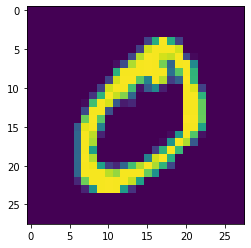

In [0]:
plt.imshow(single_image)

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [0]:
y_example.shape

(60000, 10)

In [0]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [0]:
y_cat_train = to_categorical(y_train,10)

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

In [0]:
scaled_image = x_train[0]

In [0]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

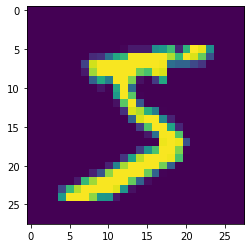

In [0]:
plt.imshow(scaled_image)

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
#batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [0]:
x_test  = x_test.reshape(10000,28,28,1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

#output layer softmax ---> Multi Class

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics = ['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=1)

In [0]:
model.fit(x_train,y_cat_train,epochs=10,validation_data = (x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1441 - accuracy: 0.9571 - val_loss: 0.0559 - val_accuracy: 0.9822
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0459 - val_accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0393 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0354 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0447 - val_accuracy: 0.9874


In [0]:
metrics = pd.DataFrame(model.history.history)

In [0]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.144092,0.957067,0.055942,0.9822
1,0.048134,0.984967,0.045939,0.9850
2,0.031792,0.989567,0.039295,0.9870
3,0.021323,0.993150,0.035386,0.9896
4,0.015103,0.995133,0.044718,0.9874


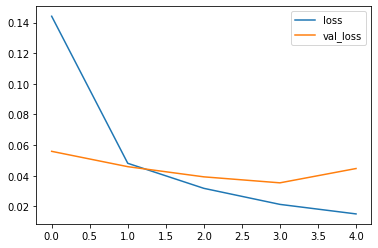

In [0]:
metrics[['loss','val_loss']].plot()

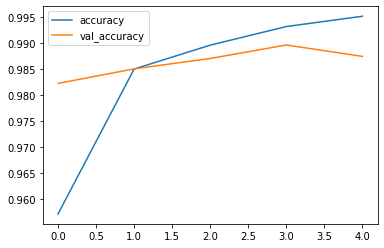

In [0]:
metrics[['accuracy','val_accuracy']].plot()

In [0]:
model.metrics_names

['loss', 'accuracy']

In [0]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04471779614686966, 0.9873999953269958]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(x_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
confusion_matrix(y_test,predictions)

array([[ 975,    0,    0,    0,    0,    0,    4,    1,    0,    0],
       [   1, 1130,    1,    0,    0,    1,    1,    1,    0,    0],
       [   3,    2, 1016,    1,    1,    0,    2,    5,    2,    0],
       [   0,    0,    3,  996,    0,    6,    0,    1,    4,    0],
       [   0,    0,    0,    0,  975,    0,    5,    0,    0,    2],
       [   2,    0,    0,    4,    0,  883,    2,    0,    1,    0],
       [   2,    1,    0,    0,    1,    4,  950,    0,    0,    0],
       [   1,    1,    5,    0,    1,    0,    0, 1019,    1,    0],
       [   6,    2,    1,    0,    1,    0,    2,    3,  956,    3],
       [   2,    1,    0,    3,    9,    3,    0,   12,    5,  974]])

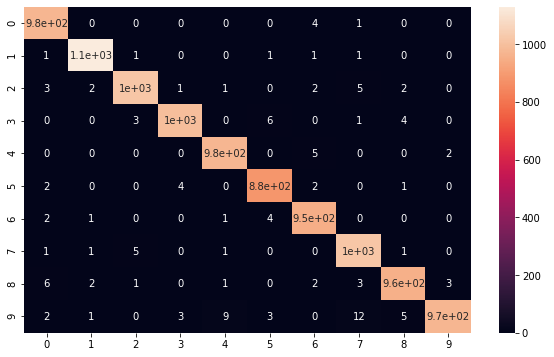

In [0]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

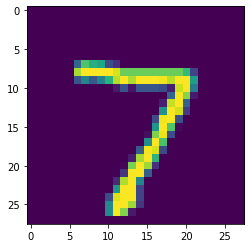

In [0]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

In [0]:
#num_images,height,color_chanels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])